In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier


# Traitement du dataset

In [2]:
# recuperation du jeu de données
df = pd.read_table('heart.txt')
#sauvegarde du jeu de données
data = df.copy()
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,feminin,140,268,A,C,160,non,36,3,C,presence
266,62,masculin,130,231,A,A,146,non,18,2,D,absence
267,64,masculin,110,211,A,C,144,oui,18,2,A,absence
268,63,feminin,150,407,A,C,154,non,40,2,D,presence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         270 non-null    int64 
 1   sexe        270 non-null    object
 2   pression    270 non-null    int64 
 3   cholester   270 non-null    int64 
 4   sucre       270 non-null    object
 5   electro     270 non-null    object
 6   taux_max    270 non-null    int64 
 7   angine      270 non-null    object
 8   depression  270 non-null    int64 
 9   pic         270 non-null    int64 
 10  vaisseau    270 non-null    object
 11  coeur       270 non-null    object
dtypes: int64(6), object(6)
memory usage: 25.4+ KB


In [59]:
# Liste des variables qualitatives
df['pic'].replace({1: 'A', 2: "B", 3: "C"}, inplace=True)
qualif = df.describe(exclude=np.number).columns
quantit = df.describe().columns
df.describe(exclude=np.number)

,sexe,electro,angine,pic,vaisseau,coeur
count,270,270,270,270,270,270
unique,2,3,2,3,4,2
top,masculin,C,non,A,A,absence
freq,183,137,181,130,160,150


## Les Graphiques

#### Pyplot

In [5]:
#pd.plotting.scatter_matrix(df.select_dtypes(exclude=['object']))

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='DarkBlue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
    

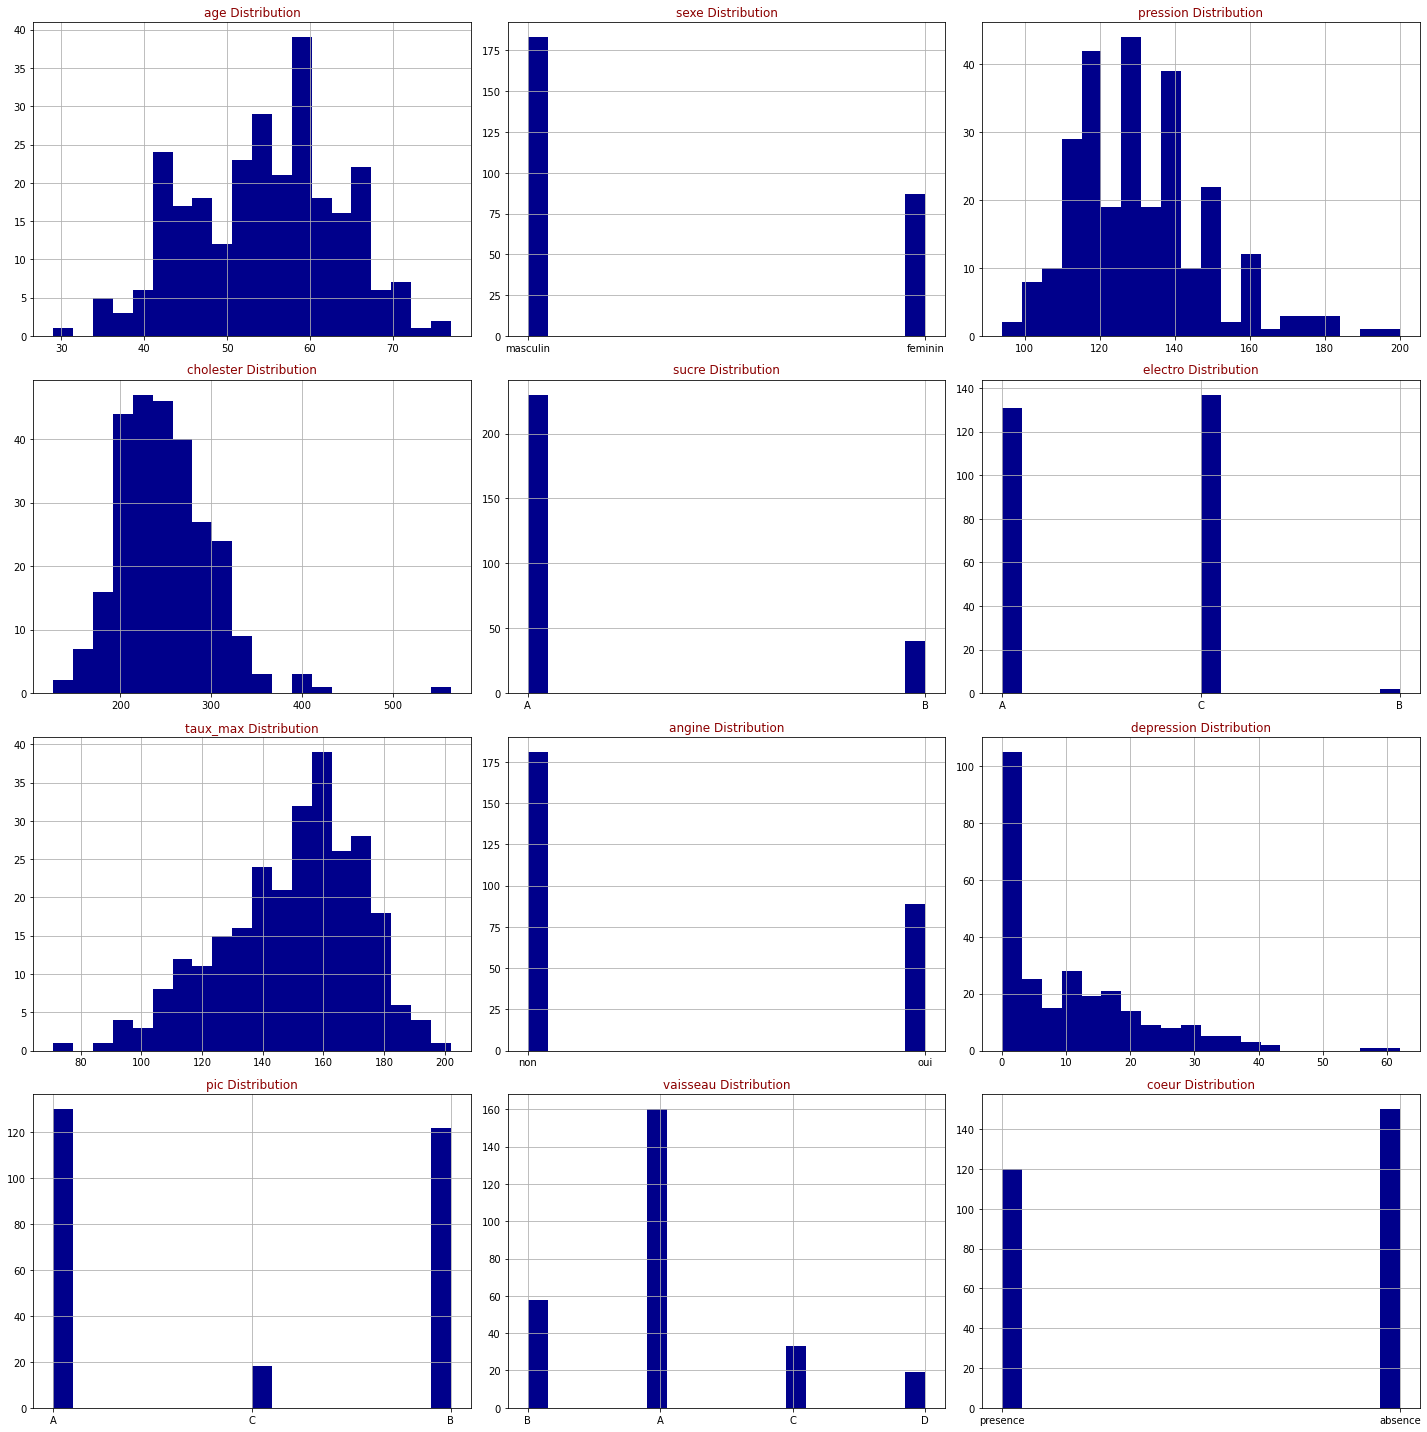

In [7]:
draw_histograms(df,df.columns,4,3)

In [20]:
df["sexe"].value_counts()

masculin    183
feminin      87
Name: sexe, dtype: int64

## Variable qualitative VS variable qualitative

In [21]:
def draw_qua_qua(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        ax.bar(x - width/2, men_means, width, label='Men')
        ax.bar(x + width/2, women_means, width, label='Women')
        
    fig.tight_layout()  
    plt.show()
    

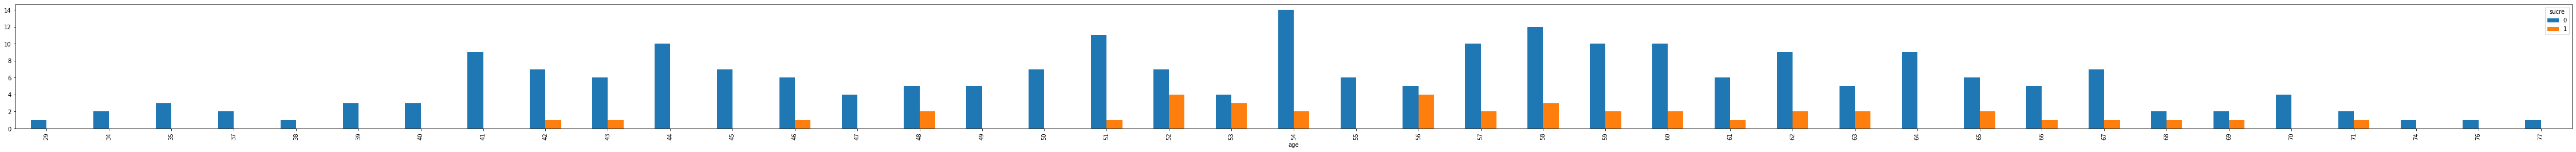

In [50]:
#draw_qua_qua(df,quantit,4,3)

gr =df.groupby(['age','sucre'])['coeur'].size().reset_index(name="Count")

piv = pd.pivot_table(gr,  values='Count',  columns=['sucre'],  
                         index = "age", aggfunc=np.sum,  fill_value=0)

piv.plot(kind="bar")
plt.rcParams["figure.figsize"] = (40,2)
plt.show()

In [60]:
qual = df.drop(columns=quantit)
quan = df.drop(columns=qualif)

## Variable Quantitative VS variable Quantitative

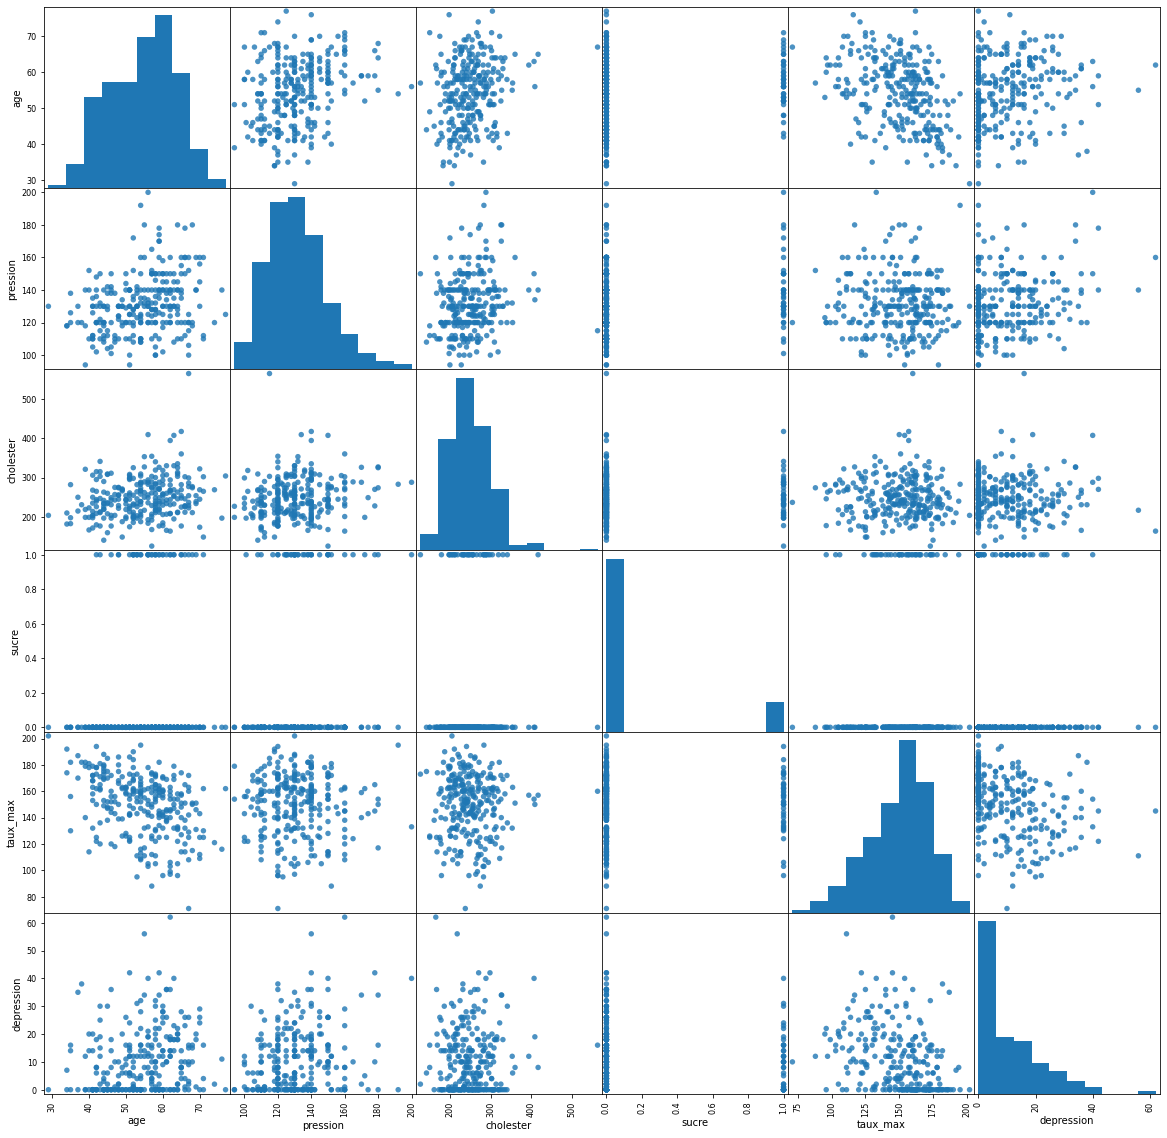

In [63]:
pd.plotting.scatter_matrix(quan, figsize=(20,20), marker = 'o', s = 30, alpha = 0.8)
plt.show()

## Variable Quantitative VS Qualitative

In [97]:
def draw_boxplot(dataframe, qualitative, quantitative, rows, cols):
    print(quantitative)
    fig=plt.figure(figsize=(20,20))
    for i, quali in enumerate(qualitative):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe.boxplot(column=[quantitative], by= quali, ax=ax)
        #dataframe[feature].hist(bins=20,ax=ax,facecolor='DarkBlue')
        ax.set_title(quali+" By "+ quantitative,color='DarkRed')
        
    fig.tight_layout()  
    plt.show()

age


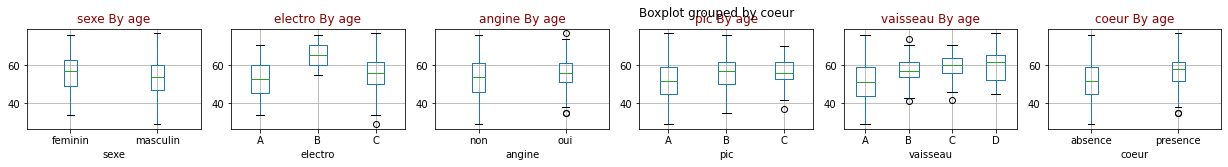

pression


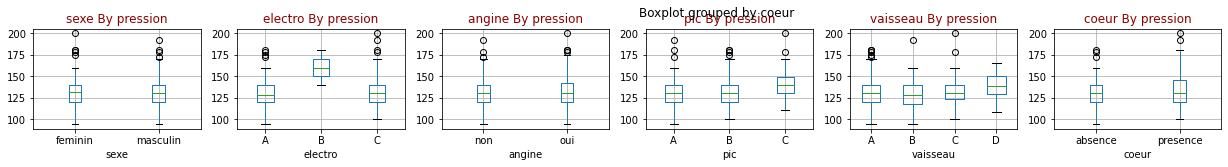

cholester


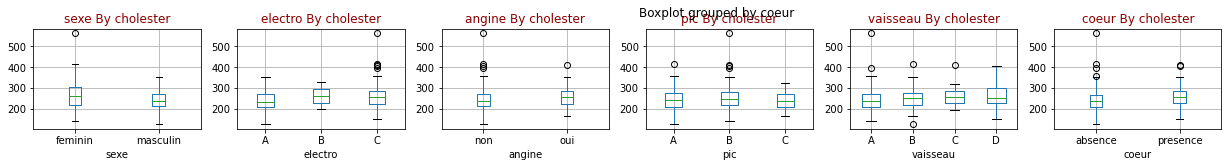

sucre


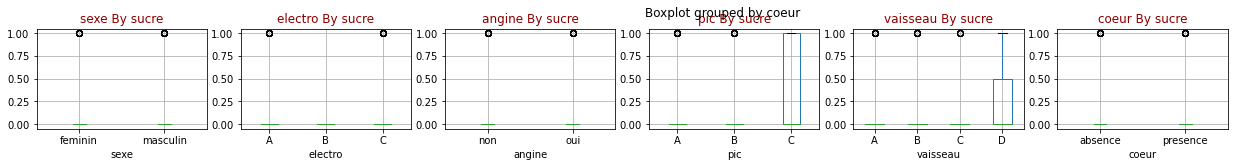

taux_max


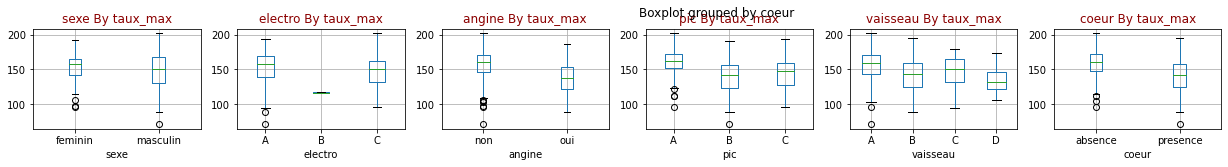

depression


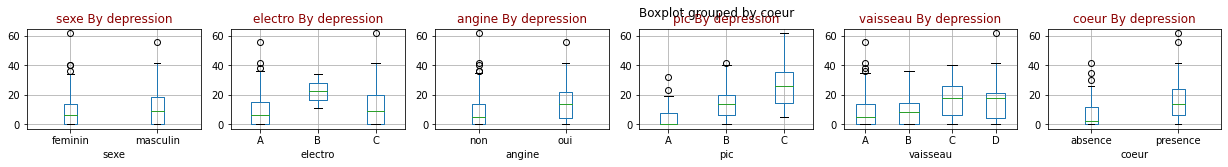

In [109]:
for val in quantit:
    draw_boxplot(df, qualif, val, 10, 7)

# SEABORN


In [99]:
qualif

Index(['sexe', 'electro', 'angine', 'pic', 'vaisseau', 'coeur'], dtype='object')

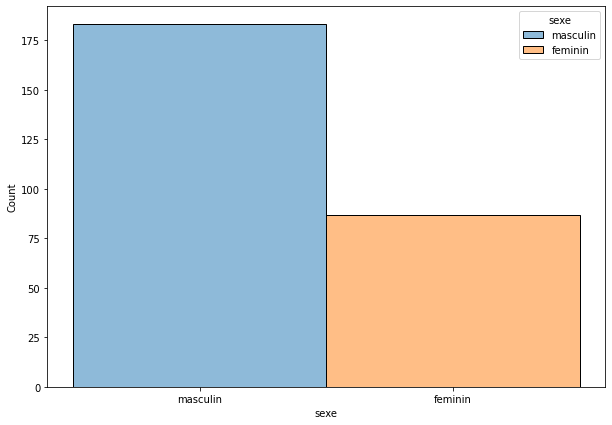

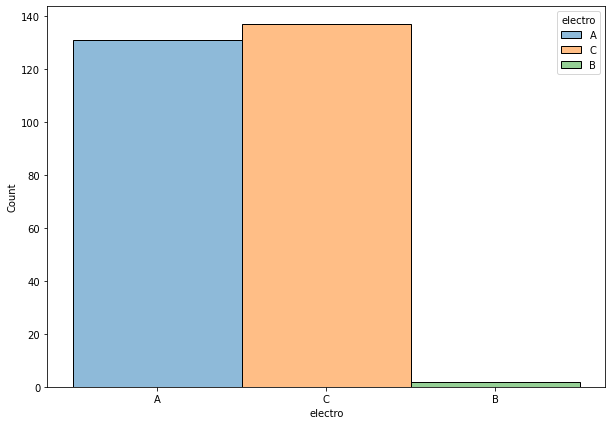

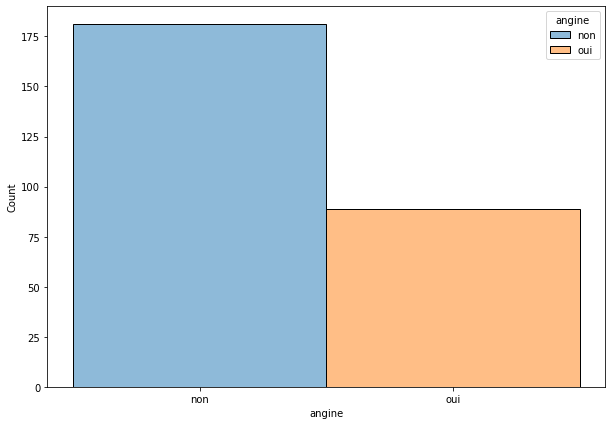

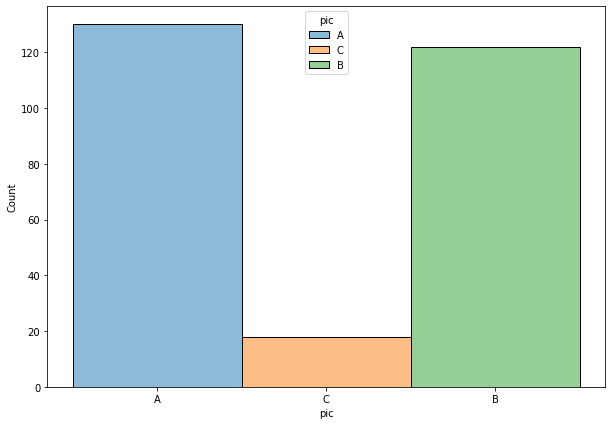

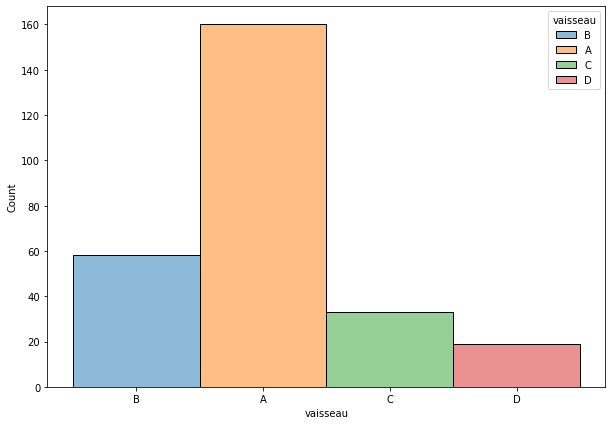

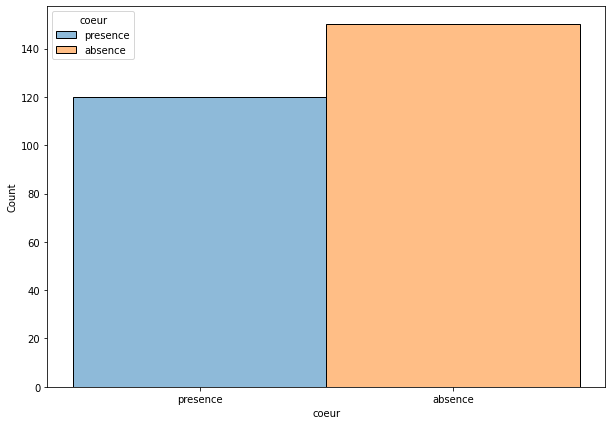

In [108]:
for f in qualif:
    plt.figure(figsize=(10,7))
    sns.histplot(data=df, x=f, hue=f)

## variable quantitative

In [110]:
quantit

Index(['age', 'pression', 'cholester', 'sucre', 'taux_max', 'depression'], dtype='object')

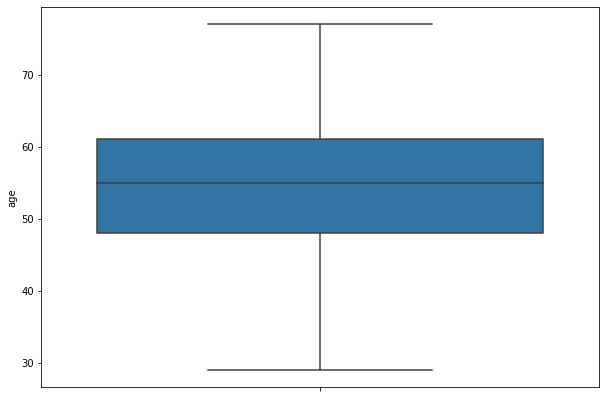

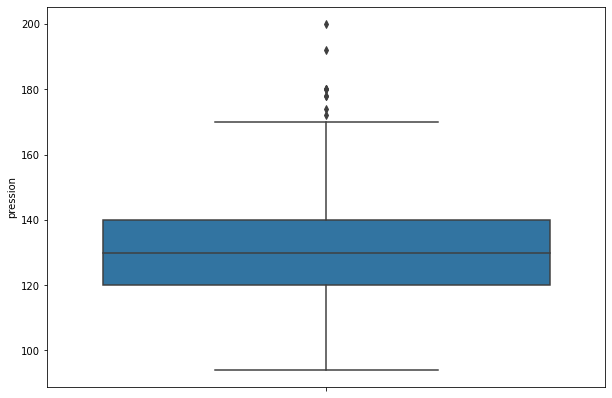

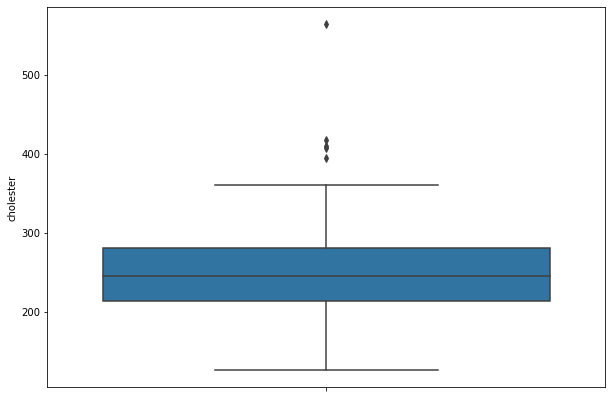

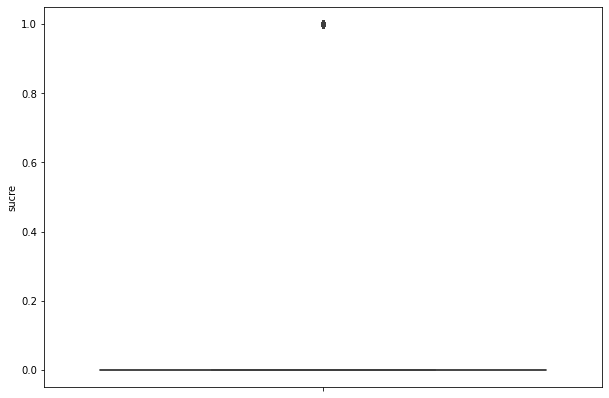

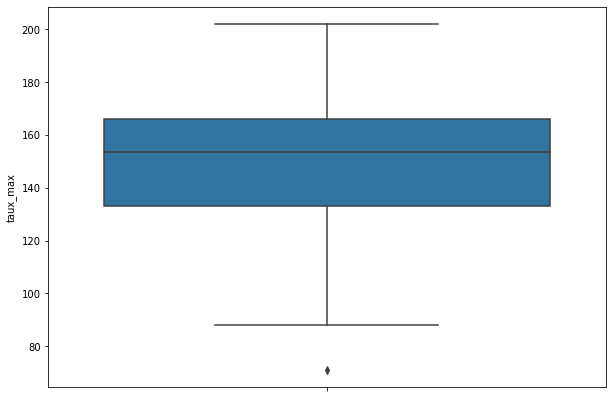

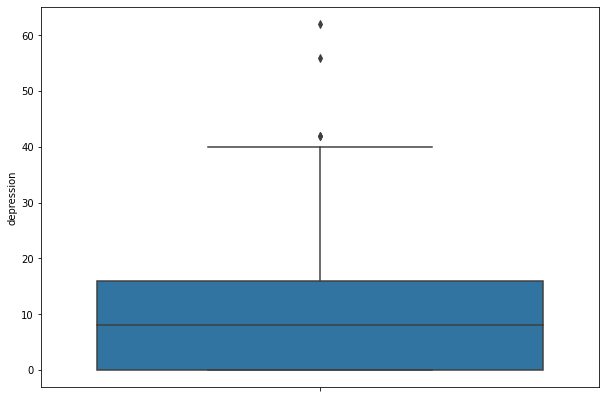

In [112]:
for q in quantit:
    plt.figure(figsize=(10,7))
    sns.boxplot(data=df, y=q)

In [113]:
## quantitative 2a 2

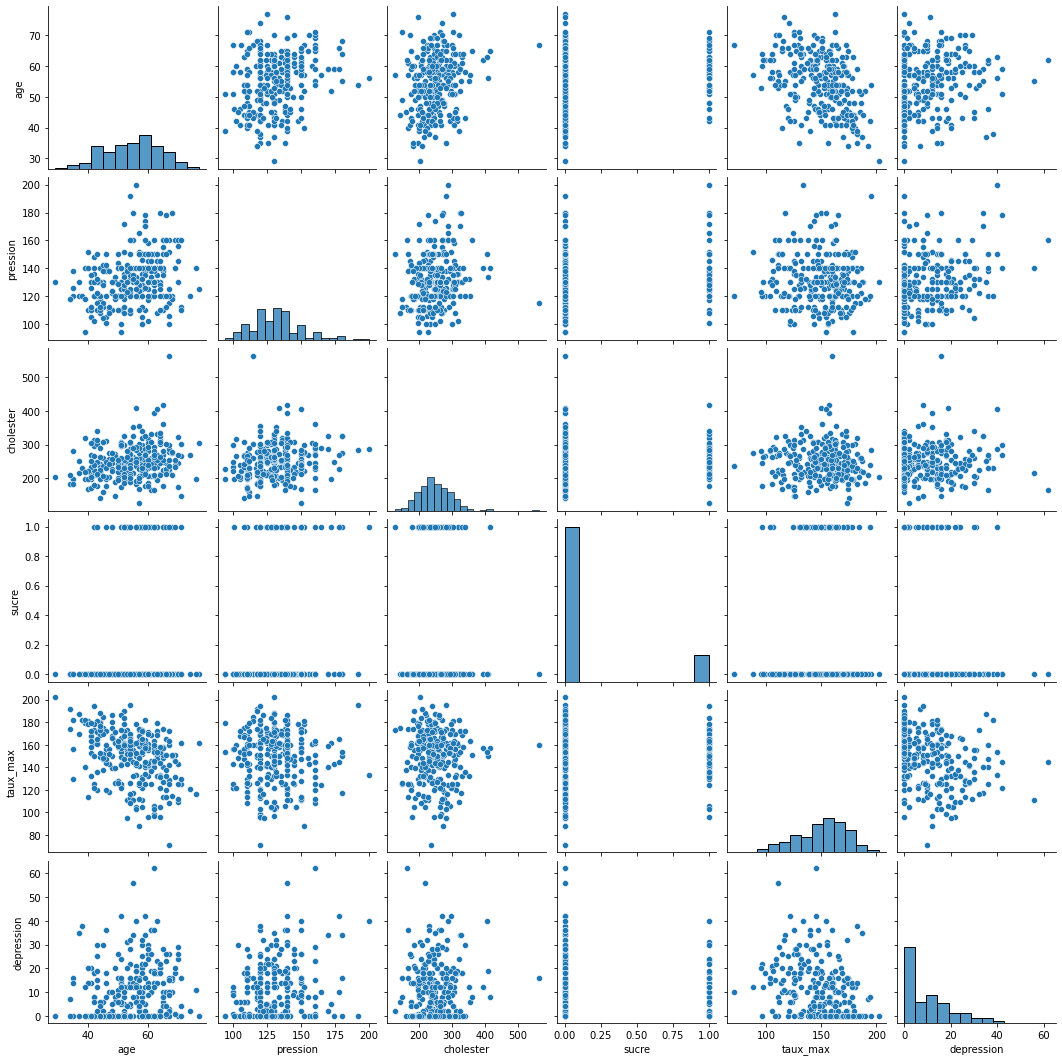

In [114]:
sns.pairplot(quan)

## quanti-quali

<ipython-input-116-3b34e234dbe2>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,7))


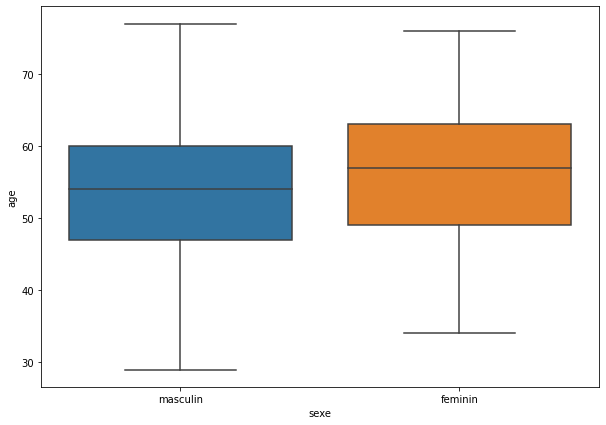

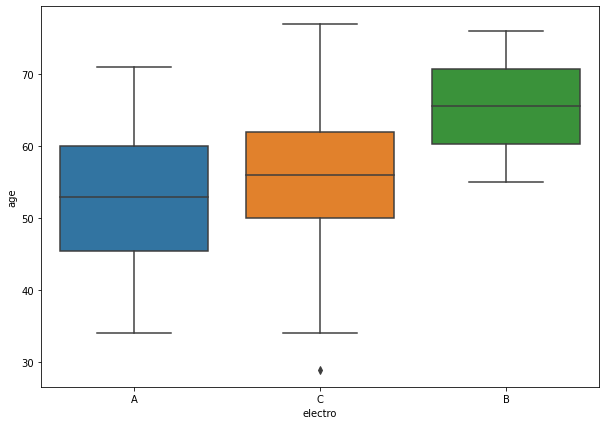

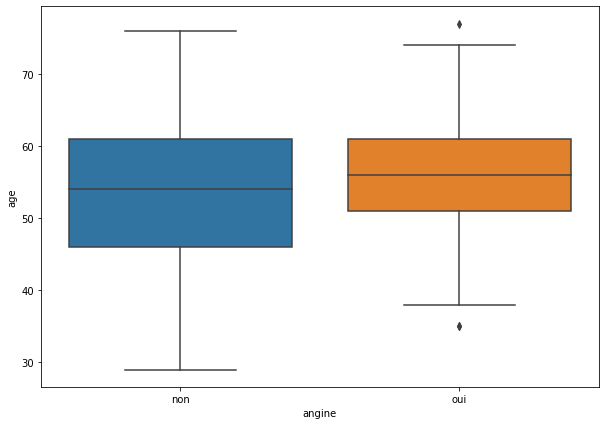

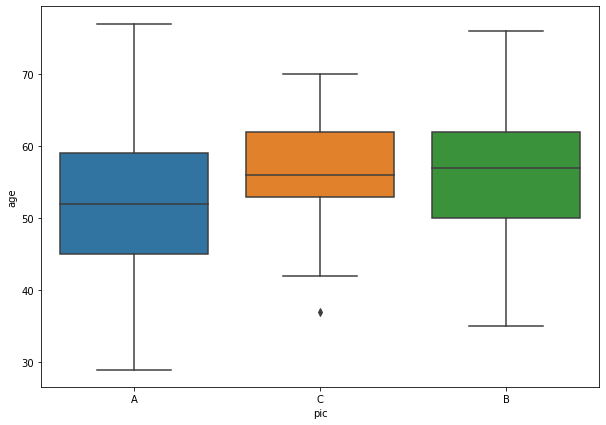

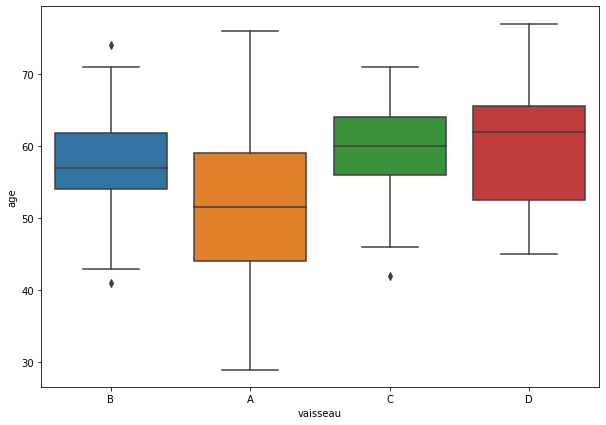

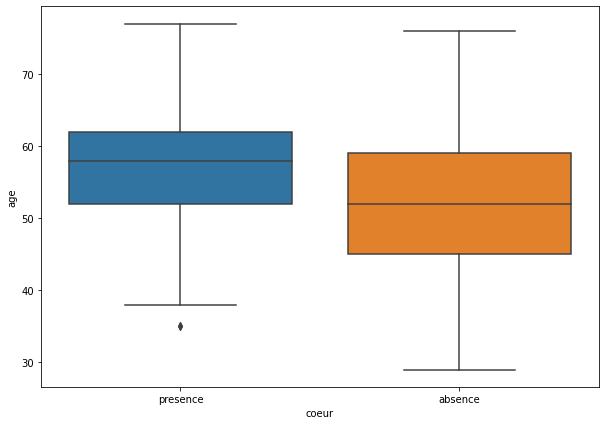

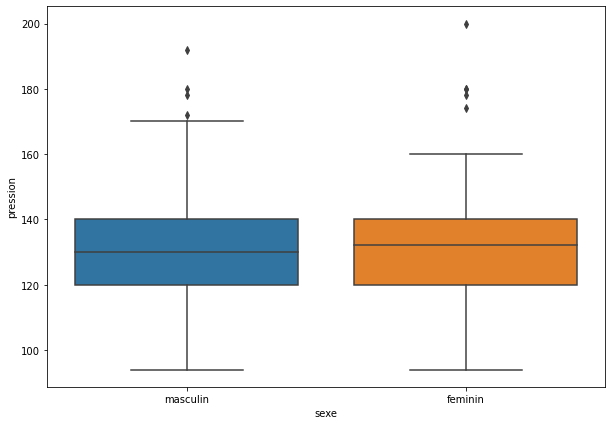

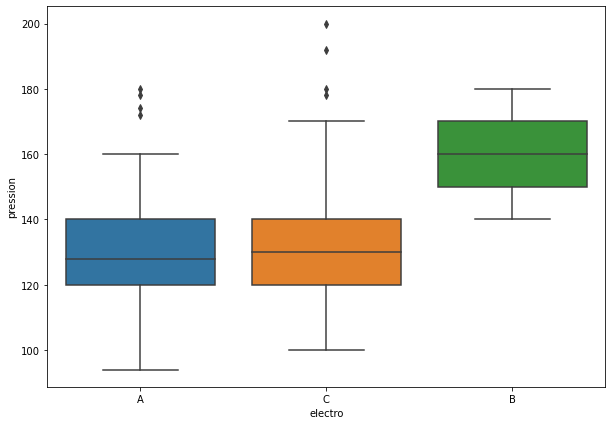

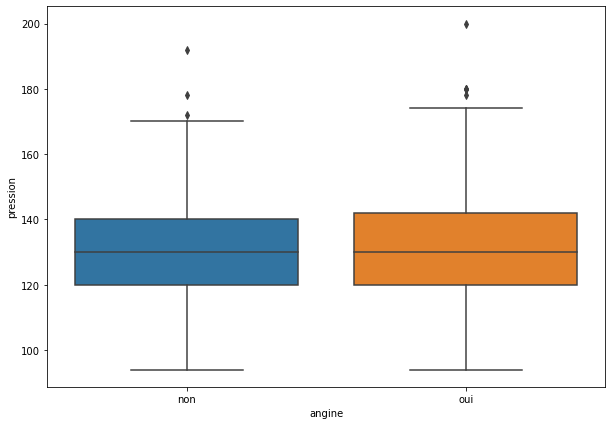

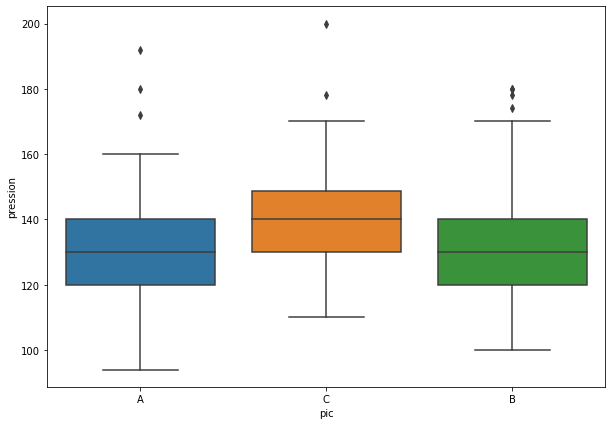

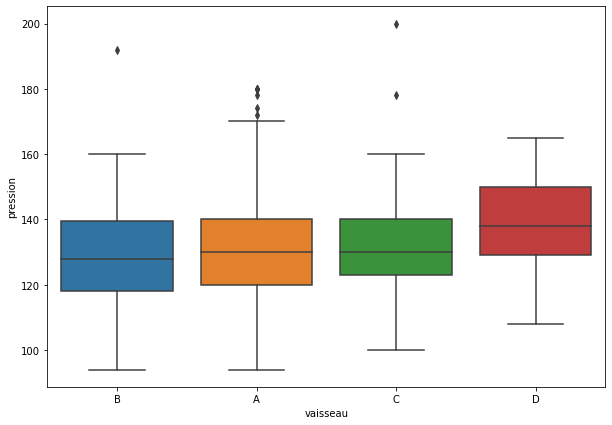

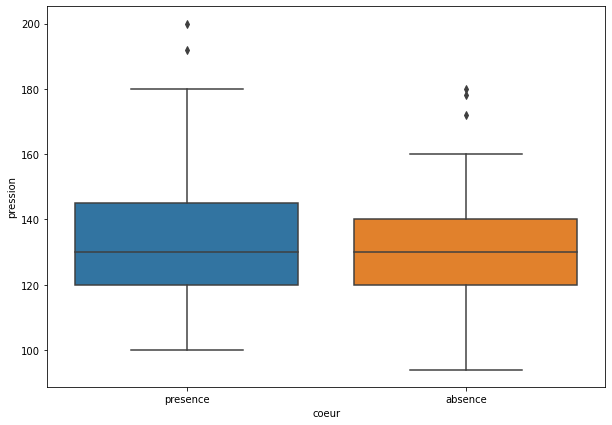

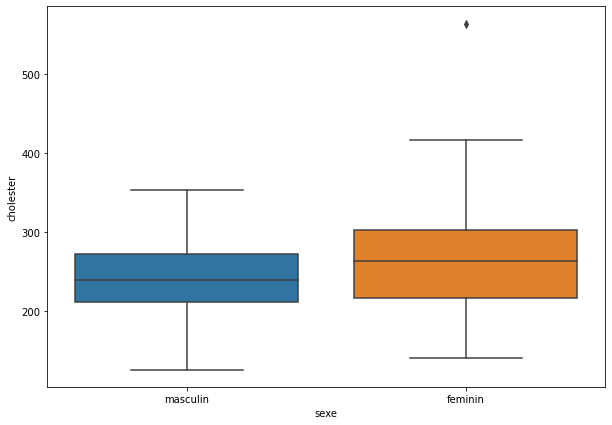

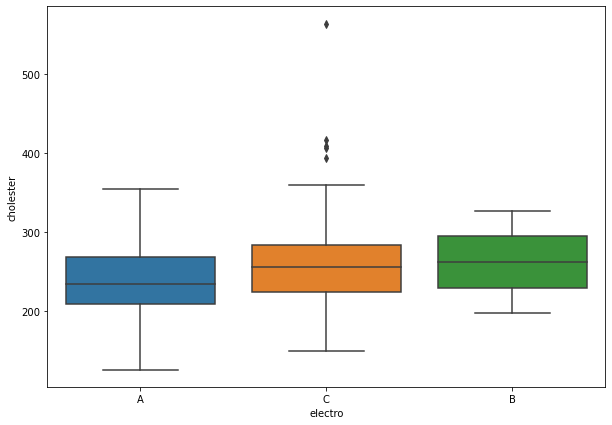

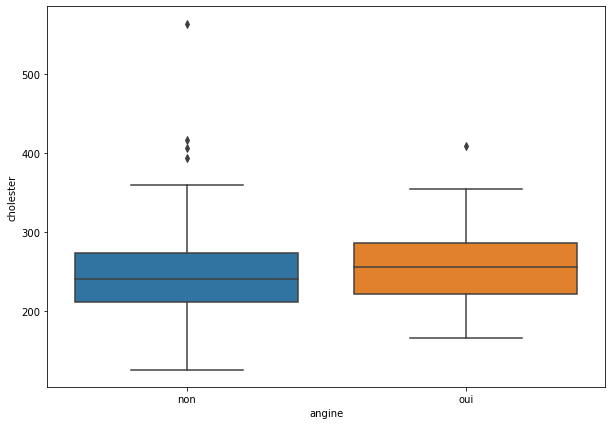

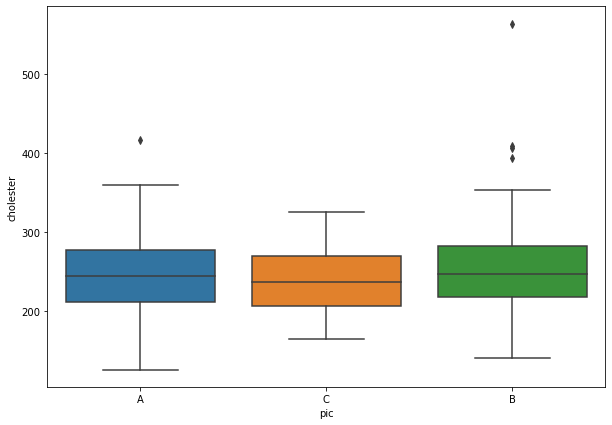

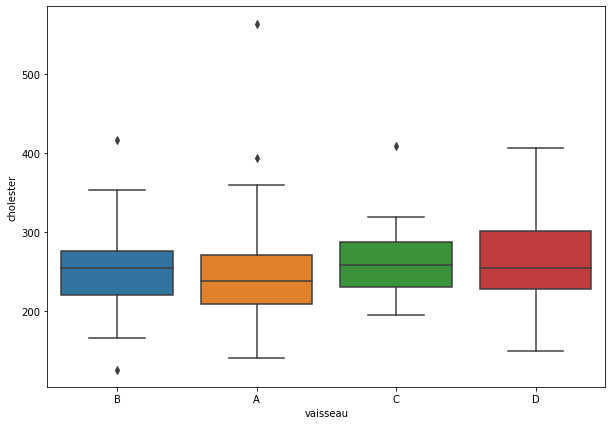

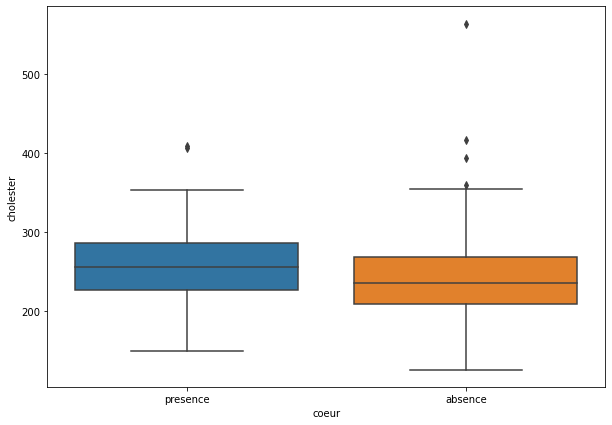

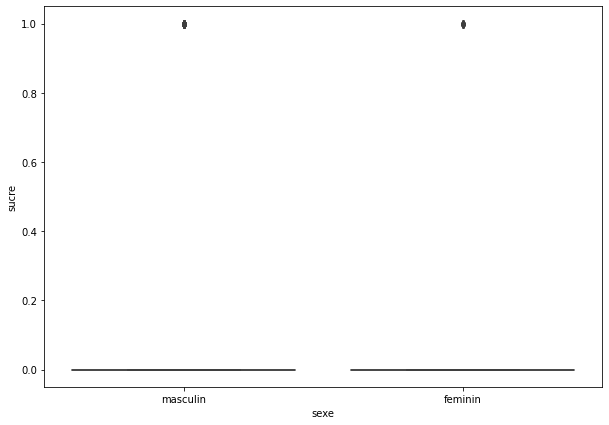

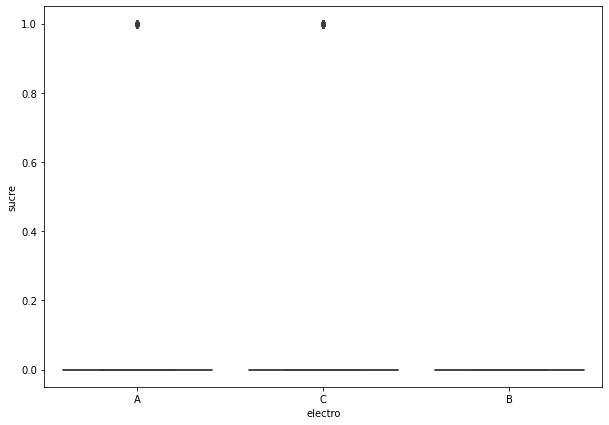

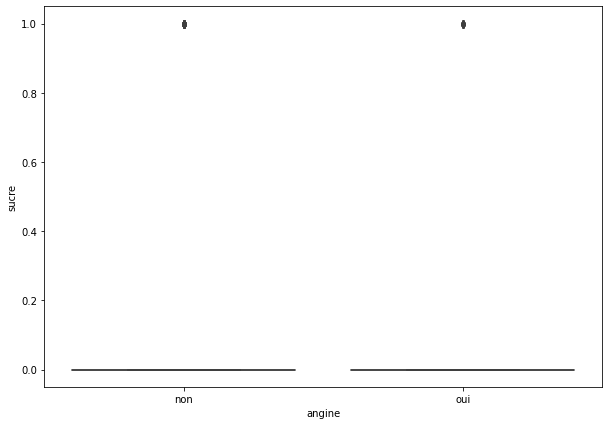

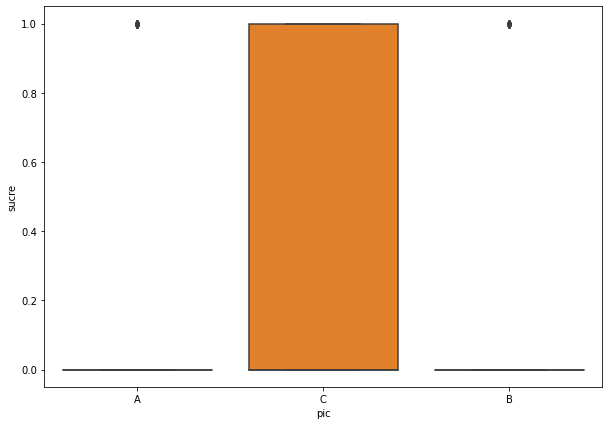

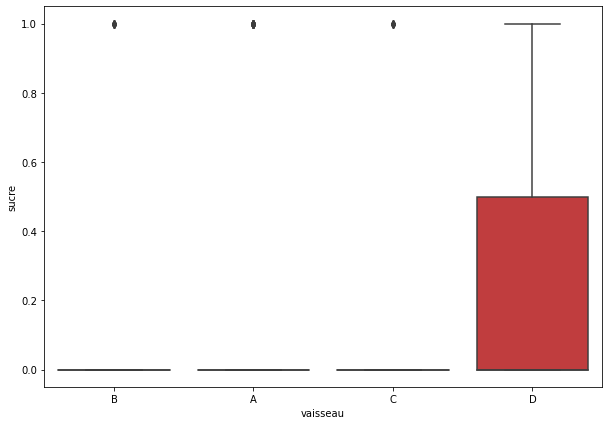

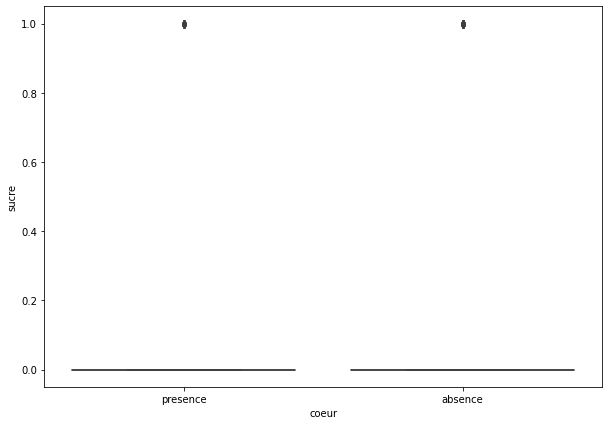

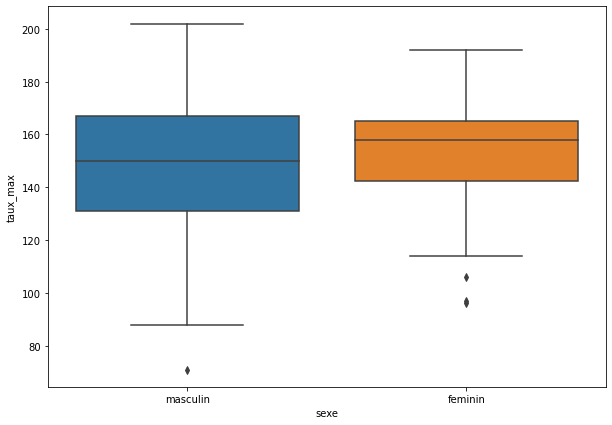

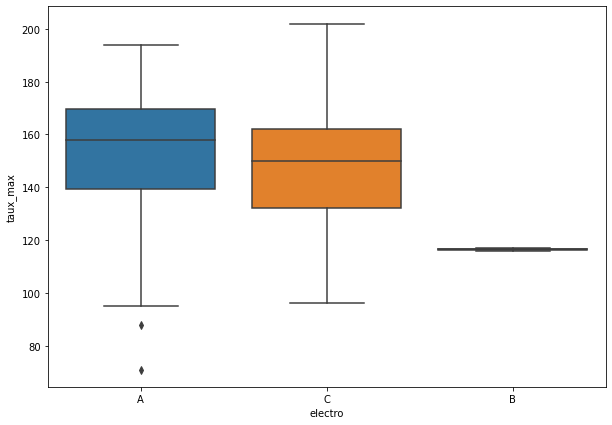

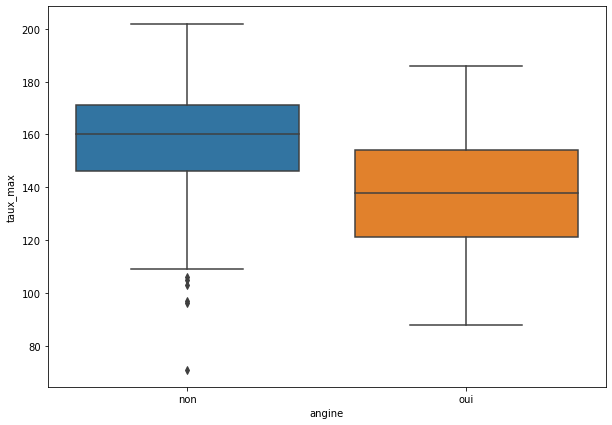

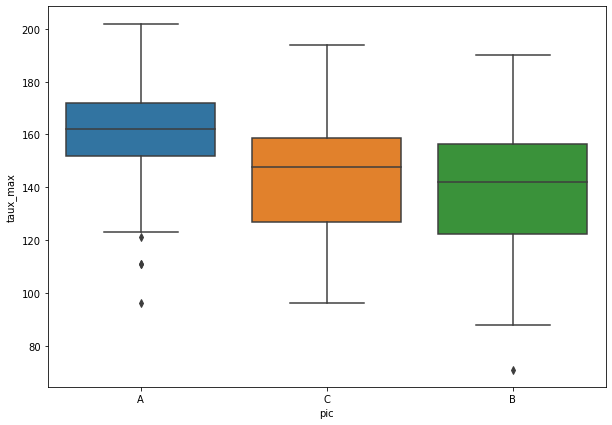

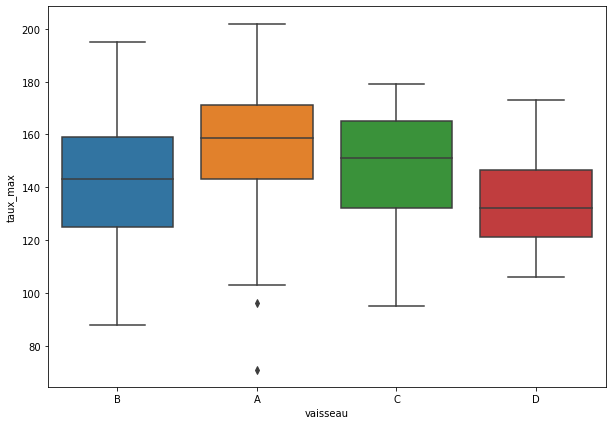

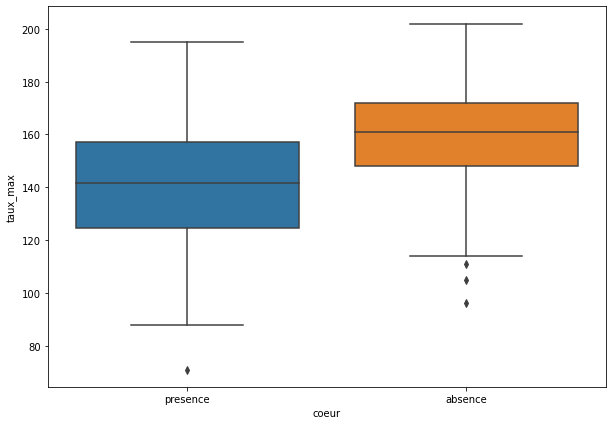

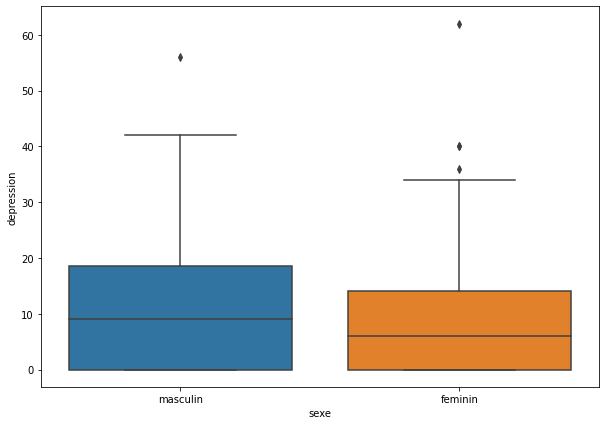

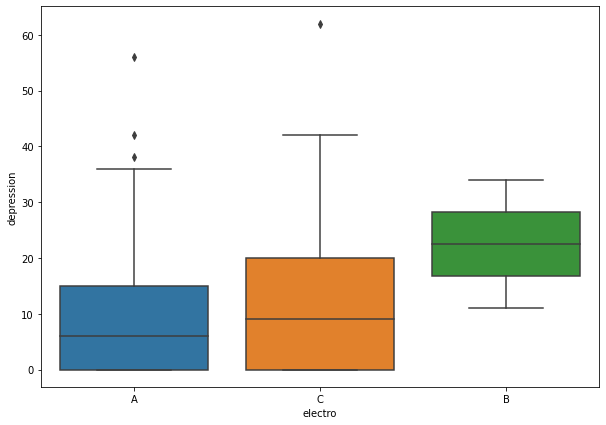

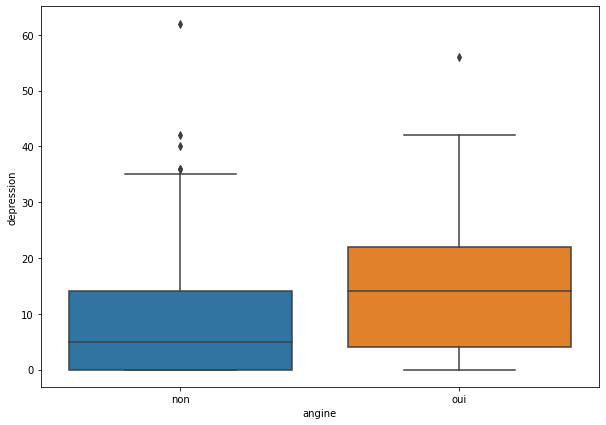

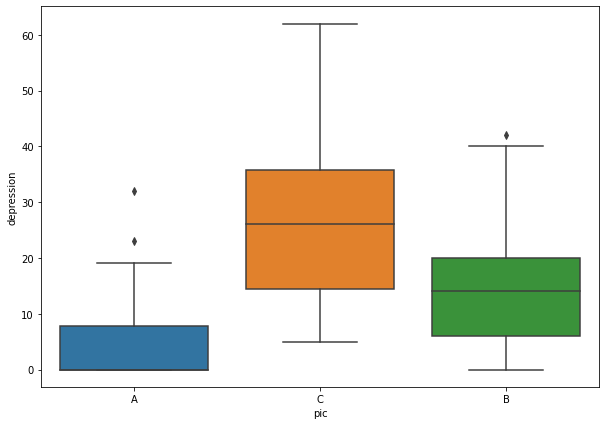

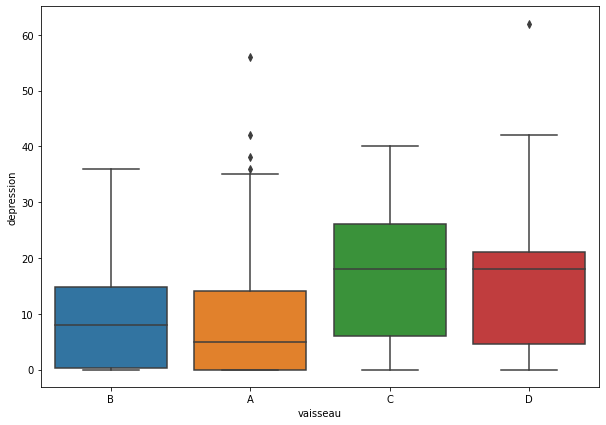

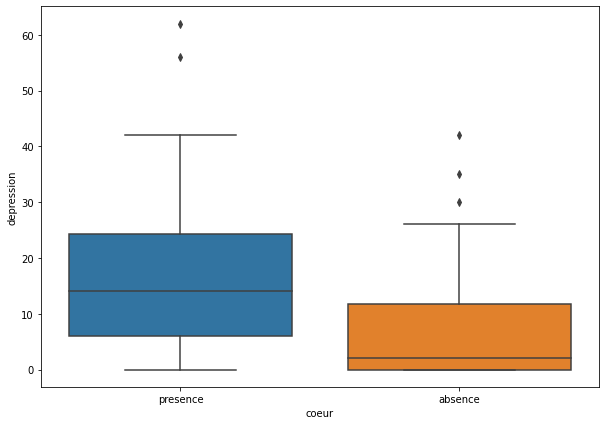

In [116]:
for a in quantit:
    for i in qualif:
        plt.figure(figsize=(10,7))
        sns.boxplot(y=a, x=i, data=df)

# TRAINING

## regression lineaire

In [117]:
#Encodage des variables qualitatives
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
for i in qualif:
    df[i] = lb_make.fit_transform(data[i])
    
df

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,1,100,234,0,0,156,0,1,0,1,1
1,41,0,130,204,0,2,172,0,14,0,0,0
2,58,1,150,270,0,2,111,1,8,0,0,1
3,53,1,140,203,1,2,155,1,31,2,0,1
4,41,1,130,214,0,2,168,0,20,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,62,0,140,268,0,2,160,0,36,2,2,1
266,62,1,130,231,0,0,146,0,18,1,3,0
267,64,1,110,211,0,2,144,1,18,1,0,0
268,63,0,150,407,0,2,154,0,40,1,3,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         270 non-null    int64
 1   sexe        270 non-null    int64
 2   pression    270 non-null    int64
 3   cholester   270 non-null    int64
 4   sucre       270 non-null    int64
 5   electro     270 non-null    int64
 6   taux_max    270 non-null    int64
 7   angine      270 non-null    int64
 8   depression  270 non-null    int64
 9   pic         270 non-null    int64
 10  vaisseau    270 non-null    int64
 11  coeur       270 non-null    int64
dtypes: int64(12)
memory usage: 25.4 KB


In [188]:
#Diviser le dataframe
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['coeur'], test_size=0.2, random_state=0)
X_train

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
5,65,0,155,269,0,0,148,0,8,0,0,0
22,35,1,126,282,0,2,156,1,0,0,0,1
196,53,0,138,234,0,2,160,0,0,0,0,0
110,51,1,100,222,0,0,143,1,12,1,0,0
12,45,0,130,234,0,2,175,0,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
251,49,1,120,188,0,0,139,0,20,1,3,1
192,49,1,130,266,0,0,171,0,6,0,0,0
117,70,1,145,174,0,0,125,1,26,2,0,1
47,48,1,124,255,1,0,175,0,0,0,2,0


In [189]:
#Création du modèle et entrainement
model = LogisticRegression(random_state = 42, solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [190]:
#Prédiction
y_pred = model.predict(X_test)

In [191]:
#Evaluation (Performance du modèle)
model.score(X_test,y_test)

1.0

In [192]:
#Matrice de confusion
M_confusion = confusion_matrix(y_test, y_pred)
M_confusion

array([[37,  0],
       [ 0, 17]])

In [193]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## bagging 

In [194]:
bmodel = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=100)

bmodel.fit(X_train, y_train)
bmodel.score(X_test, y_test)

0.6666666666666666